# Исследование игровых платформ

Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Изучение данных и предобработка

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Приведем названия столбцов к нижнему регистру:

In [5]:
df.columns = df.columns.str.lower()

Пропуски в столбце 'year_of_release' заполним значением 1800, чтобы понимать в будущем что такие значения - это пропуски, и приведем к формату даты:

In [6]:
df[df['year_of_release'].isna() == True].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [7]:
print('Количество пропущенных значений в столбце "year_of_release":', df['year_of_release'].isna().sum())
print('Доля пропущенных значений в столбце "year_of_release":', df['year_of_release'].isna().sum()/ df.shape[0])

Количество пропущенных значений в столбце "year_of_release": 269
Доля пропущенных значений в столбце "year_of_release": 0.01609332934489979


In [8]:
df = df.dropna(subset = ['year_of_release']).reset_index(drop=True)

In [9]:
df['year_of_release'] = df['year_of_release'].astype(int).astype(str)
df['year_of_release'] += '-01-01'
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y-%m-%d')

Данные строки не несут в себе какой либо информации, можно удалить:

In [10]:
df[df['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
652,NaN,GEN,1993-01-01,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14022,NaN,GEN,1993-01-01,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
df = df.dropna(subset = ['name']).reset_index(drop=True)

In [12]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Оценку критиков нечем заполнить. Оставим пропуски

In [13]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

tbd - будет определено позднее (по сути это пропуск, поэтому заменим на NaN)

In [14]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.NaN

In [15]:
df['user_score'] = df['user_score'].astype(float)

In [16]:
df[df['rating'].isna() == True].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989-01-01,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984-01-01,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005-01-01,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Оценку критиков нечем заполнить. Оставим пропуски

In [17]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

In [18]:
df[df['rating'] == 'K-A']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
650,Theme Hospital,PC,1997-01-01,Strategy,2.30,0.10,0.00,0.00,NaN,9.0,K-A
892,PaRappa The Rapper,PS,1996-01-01,Misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A
16410,Worms 2,PC,1997-01-01,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A


In [19]:
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'

Рейтинг K-A устаревший, он был заменен рейтингом Е, проведем замену в таблице.

In [20]:
df['rating'] = df['rating'].fillna('None')

Посчитаем общую выручку:

In [21]:
df['sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [22]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,None,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,None,31.38


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16444 non-null  object        
 1   platform         16444 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16444 non-null  object        
 4   na_sales         16444 non-null  float64       
 5   eu_sales         16444 non-null  float64       
 6   jp_sales         16444 non-null  float64       
 7   other_sales      16444 non-null  float64       
 8   critic_score     7983 non-null   float64       
 9   user_score       7463 non-null   float64       
 10  rating           16444 non-null  object        
 11  sales            16444 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 1.5+ MB


Вывод: данные были предварительно обработаны: проанализированы пропуски и изменены типы данных. Также была посчитана дополнительная величина (суммарные продажи).

In [24]:
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-------------------------')
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16444 non-null  object        
 1   platform         16444 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16444 non-null  object        
 4   na_sales         16444 non-null  float64       
 5   eu_sales         16444 non-null  float64       
 6   jp_sales         16444 non-null  float64       
 7   other_sales      16444 non-null  float64       
 8   critic_score     7983 non-null   float64       
 9   user_score       7463 non-null   float64       
 10  rating           16444 non-null  object        
 11  sales            16444 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " 

## Проведем исследовательский анализ данных

### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [26]:
pivot_year_of_sales = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
pivot_year_of_sales.columns = ['count_release']

Text(0, 0.5, 'Кол-во игр')

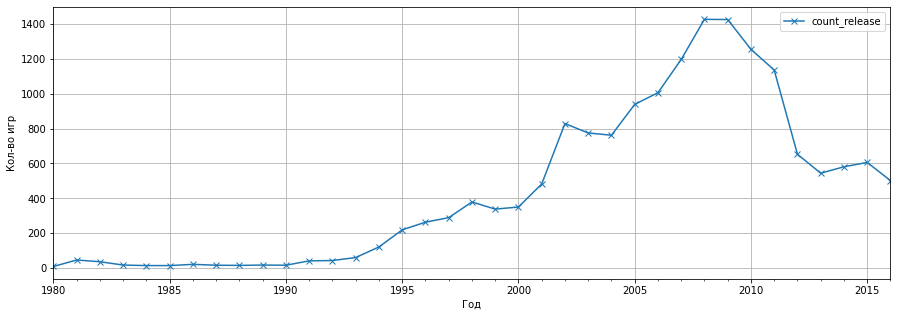

In [27]:
pivot_year_of_sales.plot(y='count_release', style='x-', grid=True, figsize=(15, 5))
plt.xlabel('Год')
plt.ylabel('Кол-во игр')

Данные до 1995 года не столь велики по сравнению с пиковыми значениями, количество игр было мало.

### Как менялись продажи по платформам? 

In [28]:
platforms_sales = df.pivot_table(index=['platform'], values='sales', aggfunc='sum').sort_values('sales', ascending=False).reset_index()
platforms_sales.head(7)

,platform,sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14


In [29]:
platforms_year_sales = df.pivot_table(index=['platform', 'year_of_release'], values='sales', aggfunc='sum').reset_index()
platforms_year_sales.head()

,platform,year_of_release,sales
0,2600,1980-01-01,11.38
1,2600,1981-01-01,35.68
2,2600,1982-01-01,28.88
3,2600,1983-01-01,5.84
4,2600,1984-01-01,0.27


In [30]:
a = []
for i in platforms_sales['platform']:
    y = platforms_year_sales[platforms_year_sales['platform'] == i].pivot_table(index='year_of_release')
    y.columns = [i]
    a.append(y)

In [31]:
platforms_global = a[0]
for i in range(len(a)):
    if i < 30:
        platforms_global = platforms_global.join(a[i+1], how='outer')
platforms_global.tail()

,PS2,X360,PS3,Wii,DS,PS,PS4,GBA,PSP,3DS,...,SAT,GEN,DC,SCD,NG,WS,TG16,3DO,GG,PCFX
year_of_release,,,,,,,,,,,,,,,,,,,,,
2012-01-01,NaN,99.74,107.36,21.71,11.01,NaN,NaN,NaN,7.69,51.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01,NaN,88.58,113.25,8.59,1.54,NaN,25.99,NaN,3.14,56.57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01,NaN,34.74,47.76,3.75,NaN,NaN,100.00,NaN,0.24,43.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,NaN,11.96,16.82,1.14,NaN,NaN,118.90,NaN,0.12,27.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01,NaN,1.52,3.60,0.18,NaN,NaN,69.25,NaN,NaN,15.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Выберем шесть самых популярных платформ:

In [32]:
popular_platforms = platforms_global[['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS']]
popular_platforms.tail()

,PS2,X360,Wii,PS3,DS,PS
year_of_release,,,,,,
2012-01-01,NaN,99.74,21.71,107.36,11.01,NaN
2013-01-01,NaN,88.58,8.59,113.25,1.54,NaN
2014-01-01,NaN,34.74,3.75,47.76,NaN,NaN
2015-01-01,NaN,11.96,1.14,16.82,NaN,NaN
2016-01-01,NaN,1.52,0.18,3.60,NaN,NaN


Text(0, 0.5, 'Продажи (млн. шт.)')

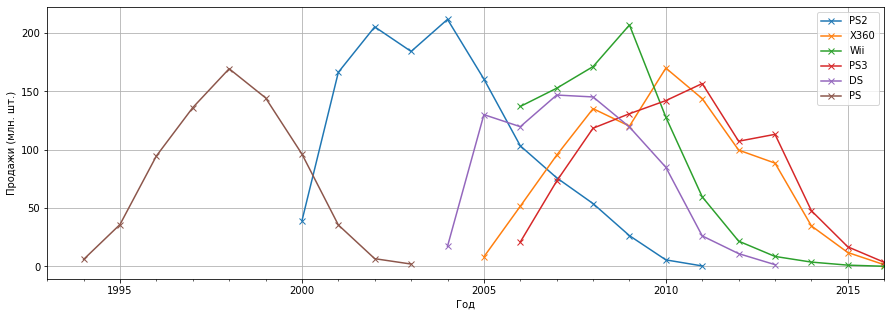

In [33]:
popular_platforms.plot(style='x-', grid=True, figsize=(15, 5), xlim=('1993', '2016'))
plt.xlabel('Год')
plt.ylabel('Продажи (млн. шт.)')

Выводы: из графика можно увидеть, что в среднем за 5 лет происходит рост платформы, и также за 5 лет игровая платформа исчезает.

### Построим прогноз на 2017 год

Актуальным периодом будем считать 5 лет, поэтому промежуток состовляет с 2012 по 2016 годы.

Сначала построим глобальный график по всем платформам чтобы увидеть общую картину.

Text(0, 0.5, 'Продажи (млн. шт.)')

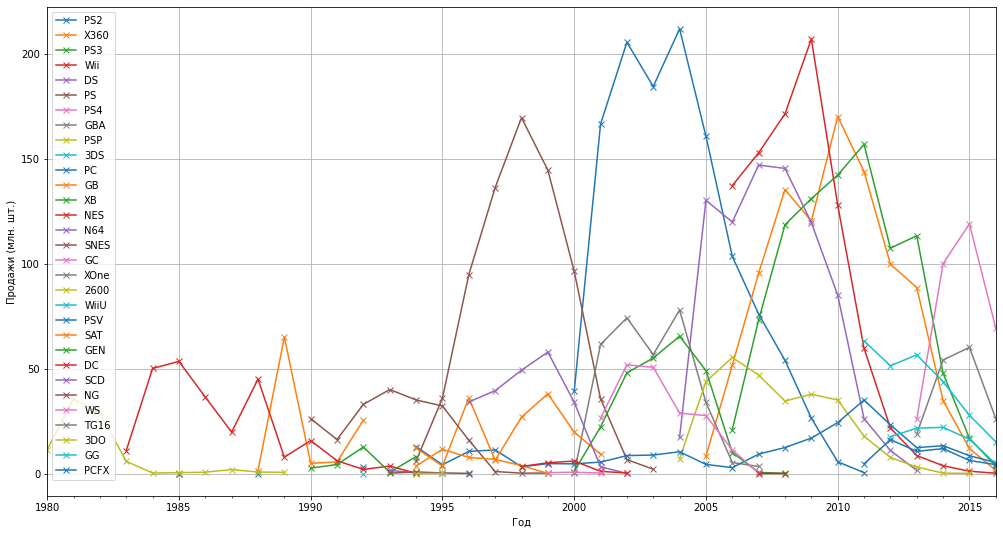

In [34]:
platforms_global.plot(style='x-', grid=True, figsize=(17, 9))
plt.xlabel('Год')
plt.ylabel('Продажи (млн. шт.)')

Рассмотрим детально последние 5 лет.

In [35]:
df_year = df.query('year_of_release >= 2012')
df_year.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013-01-01,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,None,14.63
33,Pokemon X/Pokemon Y,3DS,2013-01-01,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,None,14.60
34,Call of Duty: Black Ops II,PS3,2012-01-01,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [36]:
platforms_sales_2016 = df_year.pivot_table(index=['platform'], values='sales', aggfunc='sum').sort_values('sales', ascending=False).reset_index()
platforms_sales_2016.head(11)

,platform,sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


In [37]:
popular_platforms_2016 = platforms_global.query('year_of_release >= 2012').dropna(axis=1, how='all')
popular_platforms_2016

,X360,PS3,Wii,DS,PS4,PSP,3DS,PC,XOne,WiiU,PSV
year_of_release,,,,,,,,,,,
2012-01-01,99.74,107.36,21.71,11.01,NaN,7.69,51.36,23.22,NaN,17.56,16.19
2013-01-01,88.58,113.25,8.59,1.54,25.99,3.14,56.57,12.38,18.96,21.65,10.59
2014-01-01,34.74,47.76,3.75,NaN,100.00,0.24,43.76,13.28,54.07,22.03,11.90
2015-01-01,11.96,16.82,1.14,NaN,118.90,0.12,27.78,8.52,60.14,16.35,6.25
2016-01-01,1.52,3.60,0.18,NaN,69.25,NaN,15.14,5.25,26.15,4.60,4.25


Text(0, 0.5, 'Продажи (млн. шт.)')

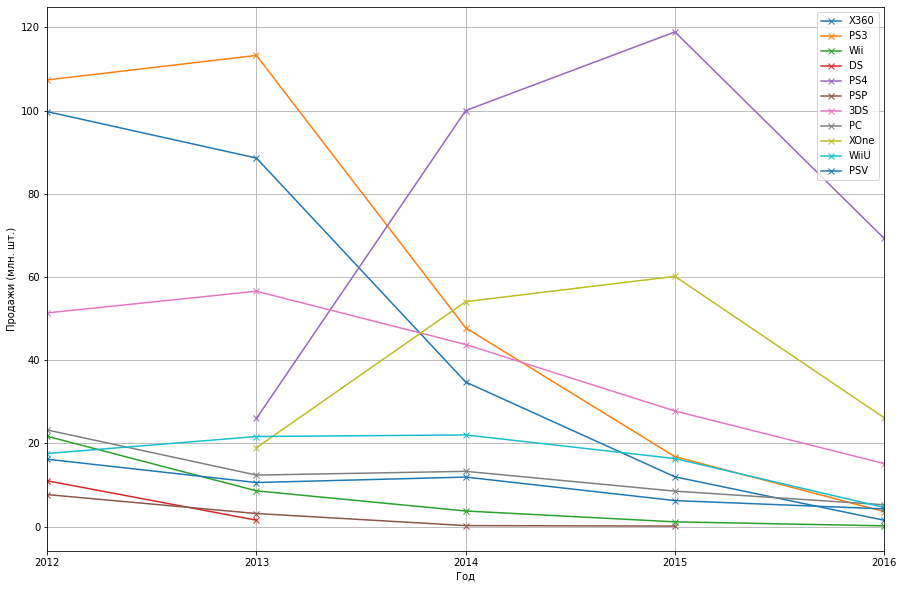

In [38]:
popular_platforms_2016.plot(style='x-', grid=True, figsize=(15, 10))
plt.xlabel('Год')
plt.ylabel('Продажи (млн. шт.)')

Вывод: Лидирует по продажам платформа PS4. Продажи на всех платформах сейчас снижаются и можем предположить что продолжат снижаться в 2017 году, но у PS4 и XOne до 2015 года наблюдался рост продаж, а в 2016 году они упали, в целом, эти две платформы остаются потенциально прибильными.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

Text(0, 0.5, 'Продажи (млн. шт.)')

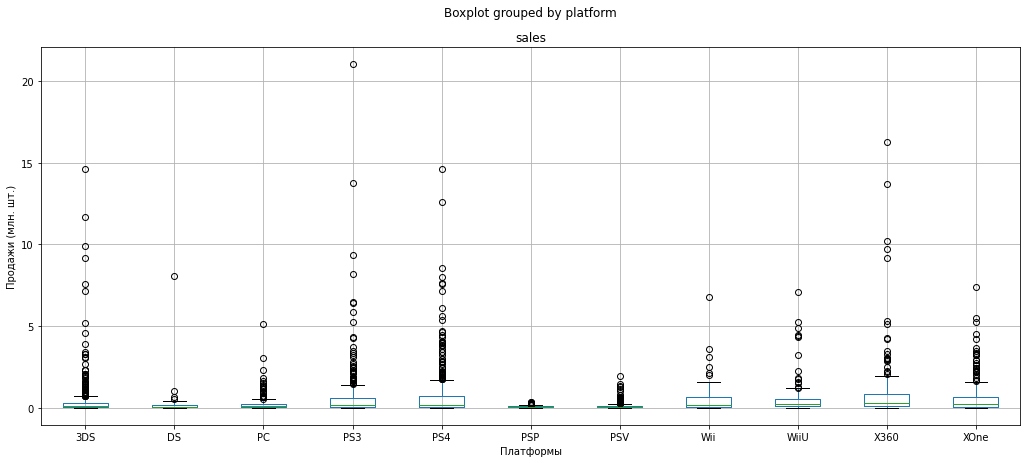

In [39]:
df_year.boxplot(figsize=(17, 7), column='sales', by='platform')
plt.xlabel('Платформы')
plt.ylabel('Продажи (млн. шт.)')

(0.0, 2.1)

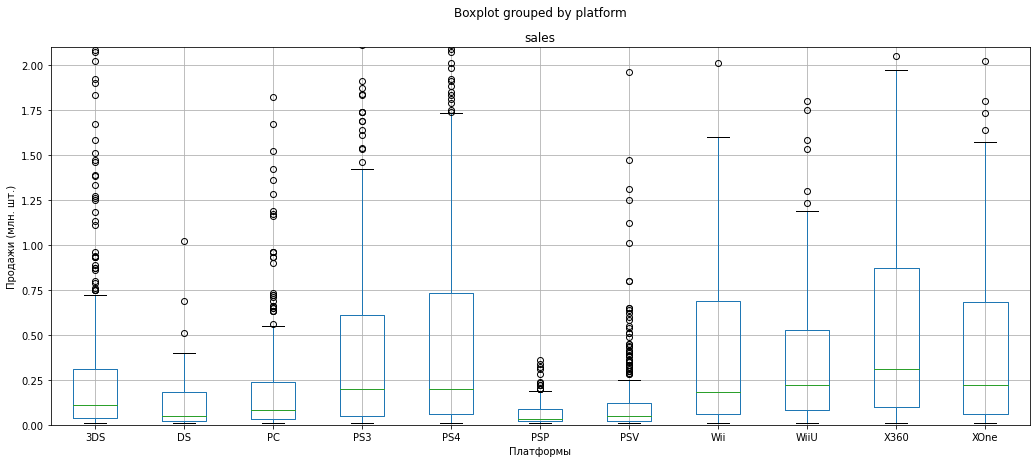

In [40]:
df_year.boxplot(figsize=(17, 7), column='sales', by='platform')
plt.xlabel('Платформы')
plt.ylabel('Продажи (млн. шт.)')
plt.ylim(0, 2.1)

Text(0, 0.5, 'Продажи (млн. шт.)')

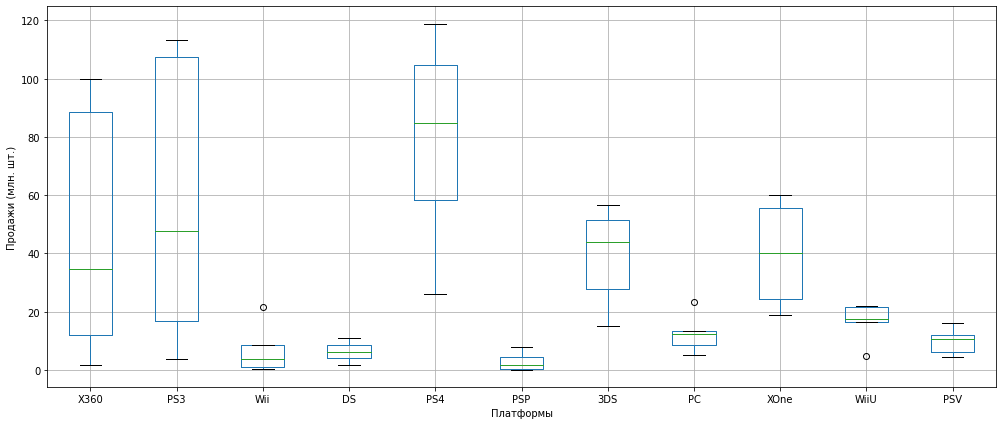

In [41]:
popular_platforms_2016.boxplot(figsize=(17, 7))
plt.xlabel('Платформы')
plt.ylabel('Продажи (млн. шт.)')

Вывод: На некоторых платформах существуют игры с большим количеством продаж, существенно превышающие средние значения. 

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Самой популярной платформой в период с 2012 по 2016 год была PS4:

In [42]:
df_critic_score = df_year.query('platform == "PS4"')
df_critic_score = df_critic_score[['critic_score', 'sales']].dropna().sort_values('critic_score').reset_index(drop=True)
df_critic_score.tail()

,critic_score,sales
247,92.0,3.97
248,92.0,2.48
249,93.0,3.42
250,93.0,5.39
251,97.0,12.62


In [88]:
df_year.year_of_release.min()

Timestamp('2012-01-01 00:00:00')

<AxesSubplot:xlabel='critic_score', ylabel='sales'>

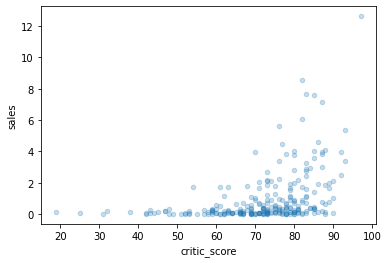

In [44]:
df_critic_score.plot(x='critic_score', y='sales', kind='scatter', alpha=0.25)

In [45]:
df_critic_score['critic_score'].corr(df_critic_score['sales'])

0.40656790206178167

In [46]:
df_user_score = df_year.query('platform == "PS4"')
df_user_score = df_user_score[['user_score', 'sales']].dropna().sort_values('user_score').reset_index(drop=True)
df_user_score.tail()

,user_score,sales
252,8.7,0.15
253,8.7,0.42
254,8.7,0.36
255,8.8,1.66
256,9.2,3.97


<AxesSubplot:xlabel='user_score', ylabel='sales'>

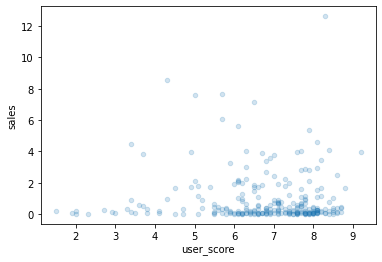

In [47]:
df_user_score.plot(x='user_score', y='sales', kind='scatter', alpha=0.2)

In [48]:
df_user_score['user_score'].corr(df_user_score['sales'])

-0.03195711020455643

Вывод: существует корреляция продаж с отзывами критиков, а вот с отзывами пользователей она почти отсутствует.

###  Продажи игр на других платформах

In [49]:
df_critic_score = df_year.query('platform == "PS3"')
df_critic_score = df_critic_score[['critic_score', 'sales']].dropna().sort_values('critic_score').reset_index(drop=True)
df_critic_score.tail()

,critic_score,sales
209,93.0,1.42
210,93.0,0.41
211,94.0,1.69
212,95.0,5.86
213,97.0,21.05


In [50]:
df_critic_score['critic_score'].corr(df_critic_score['sales'])

0.3314972592629591

In [51]:
df_user_score = df_year.query('platform == "PS3"')
df_user_score = df_user_score[['user_score', 'sales']].dropna().sort_values('user_score').reset_index(drop=True)
df_user_score.tail()

,user_score,sales
278,8.7,0.43
279,8.8,0.81
280,8.8,0.21
281,9.0,0.41
282,9.1,5.86


In [52]:
df_user_score['user_score'].corr(df_user_score['sales'])

-0.005143522887113798

In [53]:
df_critic = df_year.pivot_table(index=['platform'], values=['critic_score', 'user_score', 'sales'], aggfunc='corr')
df_critic = df_critic.drop(['critic_score','user_score'], axis=1)
df_critic.columns = ['corr']
df_critic.head(35)

corr
platform                       
3DS      critic_score  0.320803
         user_score    0.197583
         sales         1.000000
DS       user_score    0.882709
         sales         1.000000
PC       critic_score  0.237243
         user_score   -0.121867
         sales         1.000000
PS3      critic_score  0.331497
         user_score   -0.005144
         sales         1.000000
PS4      critic_score  0.406568
         user_score   -0.031957
         sales         1.000000
PSP      user_score   -0.802302
         sales         1.000000
PSV      critic_score  0.094488
         user_score   -0.004339
         sales         1.000000
Wii      critic_score -0.424341
         user_score    0.296197
         sales         1.000000
WiiU     critic_score  0.348380
         user_score    0.400219
         sales         1.000000
X360     critic_score  0.360573
         user_score    0.006164
         sales         1.000000
XOne     critic_score  0.416998
         user_score   -0.068925
         sales         1.000000

Вывод: получили аналогичный результат, рейтинг критиков коррелирует сильнее рейтинга пользователей в основном у всех топовых платформ таких как: PS4, PS3,X360,3DS и XOne. А на платформах с малым количеством игр мало оценок рейтингов и погрешность в корреляции может быть в таком случае большой.

### Общее распределение игр по жанрам

In [54]:
genre_top = df_year.pivot_table(index='genre', values='sales', aggfunc='sum').sort_values('sales', ascending=False)
genre_top.head()

,sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04


In [55]:
top = df_year.pivot_table(index=['genre'], values='name', aggfunc='count').sort_values('name', ascending=False)

In [56]:
genre_top = genre_top.join(top).reset_index()

In [57]:
genre_top.columns = [['genre', 'sales', 'count']]
genre_top

,genre,sales,count
0,Action,441.12,1031
1,Shooter,304.73,235
2,Role-Playing,192.80,370
3,Sports,181.07,268
4,Misc,85.04,192
5,Platform,61.00,85
6,Racing,53.50,115
7,Fighting,44.49,109
8,Simulation,35.12,80
9,Adventure,29.43,302


Самый прибыльный жанр Action, самый менее прибыльный Puzzle.

In [58]:
df_action = df_year.query('genre == "Action"')
df_action.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013-01-01,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
81,FIFA Soccer 13,PS3,2012-01-01,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
127,Assassin's Creed III,PS3,2012-01-01,Action,2.64,2.52,0.16,1.12,85.0,6.9,M,6.44


In [59]:
df_puzzle = df_year.query('genre == "Puzzle"')
df_puzzle.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
1672,Captain Toad: Treasure Tracker,WiiU,2014-01-01,Puzzle,0.53,0.38,0.19,0.09,81.0,8.6,E,1.19
2524,Professor Layton vs Phoenix Wright: Ace Attorney,3DS,2012-01-01,Puzzle,0.20,0.26,0.30,0.04,79.0,8.5,T,0.80
2677,Professor Layton and the Azran Legacy,3DS,2013-01-01,Puzzle,0.00,0.48,0.25,0.03,81.0,7.9,E10+,0.76
3014,Puzzler Brain Games,Wii,2012-01-01,Puzzle,0.00,0.00,0.66,0.00,NaN,NaN,None,0.66
4018,Puzzle & Dragons Z + Super Mario Bros. Edition,3DS,2015-01-01,Puzzle,0.06,0.07,0.34,0.01,NaN,NaN,None,0.48


In [60]:
df_action['sales'].median()

0.12

In [61]:
df_action['critic_score'].median()

73.0

In [62]:
df_puzzle['sales'].median()

0.045

In [63]:
df_puzzle['critic_score'].median()

71.0

Вывод: медианные значения продаж и рейтинга больше у топового жанра Action.

## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

In [64]:
platform_top = df_year.pivot_table(index=['platform'], values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
platform_top.head(11)

,platform,eu_sales,jp_sales,na_sales
0,3DS,42.64,87.79,55.31
1,DS,3.53,3.72,4.59
2,PC,37.76,0.00,19.12
3,PS3,106.86,35.29,103.38
4,PS4,141.09,15.96,108.74
5,PSP,0.42,10.47,0.13
6,PSV,11.36,21.04,10.98
7,Wii,11.92,3.39,17.45
8,WiiU,25.13,13.01,38.10
9,X360,74.52,1.57,140.05


In [65]:
jp_sales_sum = platform_top['jp_sales'].sum()

In [66]:
na_sales_sum = platform_top['na_sales'].sum()

In [67]:
eu_sales_sum = platform_top['eu_sales'].sum()

Найдем доли продаж для каждого региона выраженного в процентах:

In [68]:
platform_top_na = platform_top[['platform', 'na_sales']].sort_values('na_sales', ascending=False).reset_index(drop=True)
platform_top_na['na_sales'] = platform_top_na['na_sales'] / na_sales_sum * 100
platform_top_na.head()

,platform,na_sales
0,X360,23.698326
1,PS4,18.400257
2,PS3,17.493274
3,XOne,15.757145
4,3DS,9.359189


In [69]:
platform_top_jp = platform_top[['platform', 'jp_sales']].sort_values('jp_sales', ascending=False).reset_index(drop=True)
platform_top_jp['jp_sales'] = platform_top_jp['jp_sales'] / jp_sales_sum * 100
platform_top_jp.head()

,platform,jp_sales
0,3DS,45.586250
1,PS3,18.324852
2,PSV,10.925330
3,PS4,8.287465
4,WiiU,6.755634


In [70]:
platform_top_eu = platform_top[['platform', 'eu_sales']].sort_values('eu_sales', ascending=False).reset_index(drop=True)
platform_top_eu['eu_sales'] = platform_top_eu['eu_sales'] / eu_sales_sum * 100
platform_top_eu.head()

,platform,eu_sales
0,PS4,27.838286
1,PS3,21.084409
2,X360,14.703445
3,XOne,10.179156
4,3DS,8.413243


Вывод: доли продаж в каждом регионе сильно разнятся, как и популярные платформы.

### Самые популярные жанры (топ-5)

In [71]:
genre_top = df_year.pivot_table(index=['genre'], values=['na_sales', 'eu_sales', 'jp_sales', 'sales'], aggfunc='sum').reset_index()
genre_top.head()

,genre,eu_sales,jp_sales,na_sales,sales
0,Action,159.34,52.80,177.84,441.12
1,Adventure,9.46,8.24,8.92,29.43
2,Fighting,10.79,9.44,19.79,44.49
3,Misc,26.32,12.86,38.19,85.04
4,Platform,21.41,8.63,25.38,61.00


In [72]:
genre_top.sort_values('eu_sales', ascending=False).head()

,genre,eu_sales,jp_sales,na_sales,sales
0,Action,159.34,52.80,177.84,441.12
8,Shooter,113.47,9.23,144.77,304.73
10,Sports,69.09,8.01,81.53,181.07
7,Role-Playing,48.53,65.44,64.00,192.80
6,Racing,27.29,2.50,17.22,53.50


In [73]:
genre_top.sort_values('jp_sales', ascending=False).head()

,genre,eu_sales,jp_sales,na_sales,sales
7,Role-Playing,48.53,65.44,64.00,192.80
0,Action,159.34,52.80,177.84,441.12
3,Misc,26.32,12.86,38.19,85.04
9,Simulation,14.55,10.41,7.97,35.12
2,Fighting,10.79,9.44,19.79,44.49


In [74]:
genre_top.sort_values('na_sales', ascending=False).head()

,genre,eu_sales,jp_sales,na_sales,sales
0,Action,159.34,52.80,177.84,441.12
8,Shooter,113.47,9.23,144.77,304.73
10,Sports,69.09,8.01,81.53,181.07
7,Role-Playing,48.53,65.44,64.00,192.80
3,Misc,26.32,12.86,38.19,85.04


Вывод: жанр Action является топовым во всех регионах кроме Японии, где он занял 2-е место.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [75]:
ESRB_sales = df_year.pivot_table(index=['rating'], values=['sales', 'na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').sort_values('sales', ascending=False)
ESRB_sales.head()

,eu_sales,jp_sales,na_sales,sales
rating,,,,
M,193.96,21.20,231.57,510.11
None,91.50,108.84,103.31,330.82
E,113.03,28.33,114.37,287.17
T,52.96,26.02,66.02,162.94
E10+,55.37,8.19,75.70,155.49


Вывод: рейтинг М - для взрослых, в топах про продажам во всех регионах кроме Японии, возможно это связано с тем что рейтинг ESRB для данного региона не обязательно присваивать, поэтому в Японии в основном игры без рейтинга.

In [76]:

temp = df.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


None    6676
E       3924
T       2905
M       1536
E10+    1393
EC         8
RP         1
AO         1
Name: rating, dtype: int64

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PС одинаковые

Н0 - гипотеза о том, что средняя выручка двух игровых платформ одинакова;

H1 - гипотеза о том, что средняя выручка двух игровых платформ разная

In [77]:
user_score_PC = df_year.query('platform == "PC"')
user_score_XOne = df_year.query('platform == "XOne"')

In [78]:
user_score_PC['user_score'].describe()

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

In [79]:
user_score_XOne['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [80]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

In [81]:
results = st.ttest_ind(
    user_score_PC['user_score'].dropna(), 
    user_score_XOne['user_score'].dropna())

In [82]:
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу в пользу альтернативной")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу в пользу альтернативной


### Средние пользовательские рейтинги жанров Action и Sports одинаковые

Н0 - гипотеза о том, что средний рейтинг игр двух жанров одинаков;

H1 - гипотеза о том, что средний рейтинг игр двух жанров разный

In [83]:
user_score_action = df_year.query('genre == "Action"')
user_score_sports = df_year.query('genre == "Sports"')

In [84]:
user_score_action['user_score'].describe()

count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [85]:
user_score_sports['user_score'].describe()

count    195.000000
mean       5.455897
std        1.738646
min        0.200000
25%        4.300000
50%        5.700000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

In [86]:
results = st.ttest_ind(
    user_score_action['user_score'].dropna(), 
    user_score_sports['user_score'].dropna(),
    equal_var = False)

In [87]:
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


## Общий вывод

- успешность выпускаемой игры во многом зависит от жанра к которому она пренадлежит. Если выпустить игру популярного жанра она с большей вероятностью станет успешной чем игра не популярного жанра. В процессе работы были найдены топ 5 жанров;
- продажи игры зависят от рейтинга ESRB;
- игровые платформы появляются и исчезают, лучше выпускать игру на самой популярной игровой платформе в данный момент, либо набирающей популярность;
- в успешности игры важно мнение критиков, если у рейтинг критиков низкий, стоит прислушаться и доработать игру;
- прогнозируется что в 2017 году продажи игр будут падать;
- По итогам анализа в 2017 году рекомендуется выпустить игру на PS4 или Xbox One жанров Action или Shooter и рейтингом ESRB - М которая будет распространяться на рынках Северной Америки и Европы.